# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


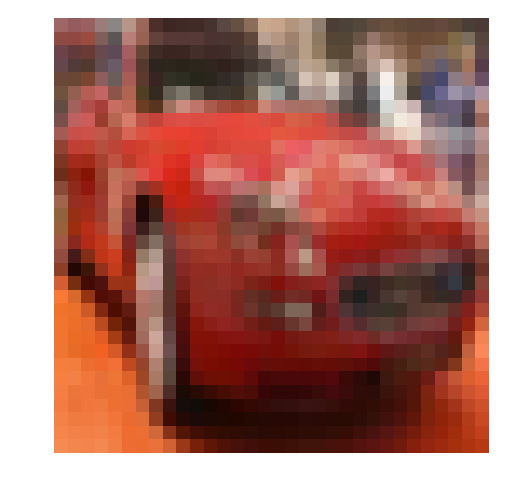

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x / 255

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
x_labels=np.eye(10, dtype=int)

from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
labelBinarizer.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function    
    return labelBinarizer.transform(x)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [8]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=(None, *image_shape), name='x')

def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=(None, n_classes), name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [9]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    # Obtaining Weights and Bias
    weights = tf.Variable(tf.truncated_normal(shape=[conv_ksize[0], conv_ksize[1], x_tensor.shape[3].value, conv_num_outputs], mean=0, stddev=0.1, dtype=tf.float32))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # Applying the Convolution to x_tensor using the above calculated Weights, bias and conv_strides  
    conv_output = tf.nn.conv2d(x_tensor, weights, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    
    # Adding the Bias
    conv_output = tf.nn.bias_add(conv_output, bias)
    
    # Add a NonLinear Activation to the Convolution => So I chose ReLU
    conv_output = tf.nn.relu(conv_output)
    
    # Applying the Max pooling using pool_ksize and pool_strides and returning the value
    conv_output = tf.nn.max_pool(conv_output, ksize=[1, pool_ksize[0], pool_ksize[1], 1], 
                                 strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    
    return conv_output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [11]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # SHORTCUT
    # return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=tf.nn.relu)
    
    # LONGER METHOD :-)
    
    # Getting Weights and Bias
    weights = tf.Variable(tf.truncated_normal(shape=[x_tensor.shape[1].value, num_outputs], mean=0, stddev=0.1, dtype=tf.float32))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    # Layer1 Input to Hidden
    output_layer = tf.matmul(x_tensor, weights)

    # Adding Bias
    output_layer = tf.add(output_layer, bias)

    # Applying the Activation Function
    output_layer = tf.nn.relu(output_layer)

    return output_layer
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [12]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # Long Way
    weights = tf.Variable(tf.truncated_normal(shape=[x_tensor.shape[1].value, num_outputs], mean=0, stddev=0.1, dtype=tf.float32))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    output_layer = tf.matmul(x_tensor, weights)
    
    output_layer = tf.add(output_layer, bias)
    
    return output_layer

    # Short Way
#     return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=None)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [15]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    conv_ksize = (3, 3)
    conv_strides = (2, 2)
    pool_ksize = (2, 2)
    pool_strides = (2, 2)

    conv_max_pool_layer_1 = conv2d_maxpool(x, 16, conv_ksize, (1, 1), pool_ksize, pool_strides)
    conv_max_pool_layer_2 = conv2d_maxpool(conv_max_pool_layer_1, 32, conv_ksize, conv_strides, pool_ksize, pool_strides)
#    conv_max_pool_layer_3 = conv2d_maxpool(conv_max_pool_layer_2, 64, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flattened_layer = flatten(conv_max_pool_layer_2)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)

    # Fully Connected Layer 1
    fully_connected_layer_1 = fully_conn(flattened_layer, 2 * 10)
    fully_connected_layer_1 = tf.nn.dropout(fully_connected_layer_1, keep_prob)

    # Fully Connected Layer 2
    fully_connected_layer_2 = fully_conn(fully_connected_layer_1, 2 * 10)
    fully_connected_layer_2 = tf.nn.dropout(fully_connected_layer_2, keep_prob)
    
    # Fully Connected Layer 3
#     fully_connected_layer_3 = fully_conn(fully_connected_layer_2, 10)
#     fully_connected_layer_3 = tf.nn.dropout(fully_connected_layer_3, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    output_layer = output(fully_connected_layer_2, 10)

    # TODO: return output
    return output_layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [16]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [17]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1})
    
    validation_accuracy = session.run(accuracy, feed_dict={x:valid_features, y: valid_labels, keep_prob: 1}) * 100
    
    print("Loss: {:.4f}, Validation Accuracy: {:.4f} %".format(loss, validation_accuracy))


### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [18]:
# TODO: Tune Parameters
epochs = 400
batch_size = 512
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.2913, Validation Accuracy: 9.8800 %
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.2431, Validation Accuracy: 12.4600 %
Epoch  3, CIFAR-10 Batch 1:  Loss: 2.1593, Validation Accuracy: 19.6000 %
Epoch  4, CIFAR-10 Batch 1:  Loss: 2.0775, Validation Accuracy: 24.5400 %
Epoch  5, CIFAR-10 Batch 1:  Loss: 2.0214, Validation Accuracy: 24.8000 %
Epoch  6, CIFAR-10 Batch 1:  Loss: 1.9841, Validation Accuracy: 27.1600 %
Epoch  7, CIFAR-10 Batch 1:  Loss: 1.9540, Validation Accuracy: 27.1200 %
Epoch  8, CIFAR-10 Batch 1:  Loss: 1.9190, Validation Accuracy: 28.9000 %
Epoch  9, CIFAR-10 Batch 1:  Loss: 1.8975, Validation Accuracy: 29.7000 %
Epoch 10, CIFAR-10 Batch 1:  Loss: 1.8788, Validation Accuracy: 32.2200 %
Epoch 11, CIFAR-10 Batch 1:  Loss: 1.8631, Validation Accuracy: 33.0800 %
Epoch 12, CIFAR-10 Batch 1:  Loss: 1.8341, Validation Accuracy: 34.8800 %
Epoch 13, CIFAR-10 Batch 1:  Loss: 1.8154, Validation Accuracy: 35.840

Epoch 111, CIFAR-10 Batch 1:  Loss: 1.0203, Validation Accuracy: 51.5000 %
Epoch 112, CIFAR-10 Batch 1:  Loss: 1.0118, Validation Accuracy: 51.9000 %
Epoch 113, CIFAR-10 Batch 1:  Loss: 1.0093, Validation Accuracy: 52.4000 %
Epoch 114, CIFAR-10 Batch 1:  Loss: 1.0078, Validation Accuracy: 51.3400 %
Epoch 115, CIFAR-10 Batch 1:  Loss: 1.0103, Validation Accuracy: 51.0200 %
Epoch 116, CIFAR-10 Batch 1:  Loss: 0.9841, Validation Accuracy: 51.8200 %
Epoch 117, CIFAR-10 Batch 1:  Loss: 0.9915, Validation Accuracy: 51.9600 %
Epoch 118, CIFAR-10 Batch 1:  Loss: 1.0246, Validation Accuracy: 50.3200 %
Epoch 119, CIFAR-10 Batch 1:  Loss: 1.0161, Validation Accuracy: 51.0200 %
Epoch 120, CIFAR-10 Batch 1:  Loss: 1.0112, Validation Accuracy: 51.2200 %
Epoch 121, CIFAR-10 Batch 1:  Loss: 0.9968, Validation Accuracy: 51.3200 %
Epoch 122, CIFAR-10 Batch 1:  Loss: 1.0009, Validation Accuracy: 52.0600 %
Epoch 123, CIFAR-10 Batch 1:  Loss: 0.9787, Validation Accuracy: 52.0600 %
Epoch 124, CIFAR-10 Batch

Epoch 221, CIFAR-10 Batch 1:  Loss: 0.7735, Validation Accuracy: 51.6000 %
Epoch 222, CIFAR-10 Batch 1:  Loss: 0.7607, Validation Accuracy: 50.8400 %
Epoch 223, CIFAR-10 Batch 1:  Loss: 0.7541, Validation Accuracy: 50.8200 %
Epoch 224, CIFAR-10 Batch 1:  Loss: 0.7668, Validation Accuracy: 50.8600 %
Epoch 225, CIFAR-10 Batch 1:  Loss: 0.7548, Validation Accuracy: 51.5400 %
Epoch 226, CIFAR-10 Batch 1:  Loss: 0.7851, Validation Accuracy: 51.5000 %
Epoch 227, CIFAR-10 Batch 1:  Loss: 0.7879, Validation Accuracy: 50.9200 %
Epoch 228, CIFAR-10 Batch 1:  Loss: 0.7610, Validation Accuracy: 52.4400 %
Epoch 229, CIFAR-10 Batch 1:  Loss: 0.7272, Validation Accuracy: 52.2400 %
Epoch 230, CIFAR-10 Batch 1:  Loss: 0.7177, Validation Accuracy: 52.3000 %
Epoch 231, CIFAR-10 Batch 1:  Loss: 0.7630, Validation Accuracy: 52.5600 %
Epoch 232, CIFAR-10 Batch 1:  Loss: 0.7447, Validation Accuracy: 51.6800 %
Epoch 233, CIFAR-10 Batch 1:  Loss: 0.7175, Validation Accuracy: 52.3800 %
Epoch 234, CIFAR-10 Batch

Epoch 331, CIFAR-10 Batch 1:  Loss: 0.5623, Validation Accuracy: 51.4600 %
Epoch 332, CIFAR-10 Batch 1:  Loss: 0.5711, Validation Accuracy: 51.5200 %
Epoch 333, CIFAR-10 Batch 1:  Loss: 0.5761, Validation Accuracy: 52.2000 %
Epoch 334, CIFAR-10 Batch 1:  Loss: 0.5674, Validation Accuracy: 52.1200 %
Epoch 335, CIFAR-10 Batch 1:  Loss: 0.5809, Validation Accuracy: 51.3600 %
Epoch 336, CIFAR-10 Batch 1:  Loss: 0.5693, Validation Accuracy: 51.6600 %
Epoch 337, CIFAR-10 Batch 1:  Loss: 0.5753, Validation Accuracy: 51.6200 %
Epoch 338, CIFAR-10 Batch 1:  Loss: 0.5814, Validation Accuracy: 50.9400 %
Epoch 339, CIFAR-10 Batch 1:  Loss: 0.5736, Validation Accuracy: 51.3400 %
Epoch 340, CIFAR-10 Batch 1:  Loss: 0.5815, Validation Accuracy: 50.7000 %
Epoch 341, CIFAR-10 Batch 1:  Loss: 0.6088, Validation Accuracy: 51.1000 %
Epoch 342, CIFAR-10 Batch 1:  Loss: 0.6078, Validation Accuracy: 51.4600 %
Epoch 343, CIFAR-10 Batch 1:  Loss: 0.5990, Validation Accuracy: 50.8800 %
Epoch 344, CIFAR-10 Batch

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.2905, Validation Accuracy: 12.4800 %
Epoch  1, CIFAR-10 Batch 2:  Loss: 2.2276, Validation Accuracy: 14.7800 %
Epoch  1, CIFAR-10 Batch 3:  Loss: 2.1247, Validation Accuracy: 16.8200 %
Epoch  1, CIFAR-10 Batch 4:  Loss: 2.0493, Validation Accuracy: 18.5800 %
Epoch  1, CIFAR-10 Batch 5:  Loss: 2.0047, Validation Accuracy: 24.5200 %
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.0494, Validation Accuracy: 24.6000 %
Epoch  2, CIFAR-10 Batch 2:  Loss: 1.9395, Validation Accuracy: 28.8000 %
Epoch  2, CIFAR-10 Batch 3:  Loss: 1.8612, Validation Accuracy: 29.1600 %
Epoch  2, CIFAR-10 Batch 4:  Loss: 1.8356, Validation Accuracy: 31.6000 %
Epoch  2, CIFAR-10 Batch 5:  Loss: 1.8656, Validation Accuracy: 32.2000 %
Epoch  3, CIFAR-10 Batch 1:  Loss: 1.9229, Validation Accuracy: 34.0400 %
Epoch  3, CIFAR-10 Batch 2:  Loss: 1.8083, Validation Accuracy: 35.2400 %
Epoch  3, CIFAR-10 Batch 3:  Loss: 1.7213, Validation Accuracy: 34.2600 %
Epoch  3, CIFAR-10 Batch 4

Epoch 23, CIFAR-10 Batch 2:  Loss: 1.2354, Validation Accuracy: 53.7800 %
Epoch 23, CIFAR-10 Batch 3:  Loss: 1.1361, Validation Accuracy: 52.7400 %
Epoch 23, CIFAR-10 Batch 4:  Loss: 1.1652, Validation Accuracy: 53.2400 %
Epoch 23, CIFAR-10 Batch 5:  Loss: 1.2315, Validation Accuracy: 53.1200 %
Epoch 24, CIFAR-10 Batch 1:  Loss: 1.2904, Validation Accuracy: 53.3000 %
Epoch 24, CIFAR-10 Batch 2:  Loss: 1.2279, Validation Accuracy: 53.6000 %
Epoch 24, CIFAR-10 Batch 3:  Loss: 1.1560, Validation Accuracy: 53.1800 %
Epoch 24, CIFAR-10 Batch 4:  Loss: 1.1723, Validation Accuracy: 53.0200 %
Epoch 24, CIFAR-10 Batch 5:  Loss: 1.2302, Validation Accuracy: 52.9000 %
Epoch 25, CIFAR-10 Batch 1:  Loss: 1.2845, Validation Accuracy: 53.4600 %
Epoch 25, CIFAR-10 Batch 2:  Loss: 1.2074, Validation Accuracy: 54.1200 %
Epoch 25, CIFAR-10 Batch 3:  Loss: 1.1182, Validation Accuracy: 53.7600 %
Epoch 25, CIFAR-10 Batch 4:  Loss: 1.1413, Validation Accuracy: 54.2600 %
Epoch 25, CIFAR-10 Batch 5:  Loss: 1.2

Epoch 45, CIFAR-10 Batch 3:  Loss: 0.9955, Validation Accuracy: 58.3400 %
Epoch 45, CIFAR-10 Batch 4:  Loss: 0.9803, Validation Accuracy: 57.4000 %
Epoch 45, CIFAR-10 Batch 5:  Loss: 1.0473, Validation Accuracy: 57.4800 %
Epoch 46, CIFAR-10 Batch 1:  Loss: 1.0983, Validation Accuracy: 58.4000 %
Epoch 46, CIFAR-10 Batch 2:  Loss: 1.0209, Validation Accuracy: 58.9600 %
Epoch 46, CIFAR-10 Batch 3:  Loss: 0.9840, Validation Accuracy: 59.0400 %
Epoch 46, CIFAR-10 Batch 4:  Loss: 0.9579, Validation Accuracy: 58.3400 %
Epoch 46, CIFAR-10 Batch 5:  Loss: 1.0332, Validation Accuracy: 57.3600 %
Epoch 47, CIFAR-10 Batch 1:  Loss: 1.0889, Validation Accuracy: 58.7000 %
Epoch 47, CIFAR-10 Batch 2:  Loss: 1.0172, Validation Accuracy: 58.9200 %
Epoch 47, CIFAR-10 Batch 3:  Loss: 0.9790, Validation Accuracy: 58.3000 %
Epoch 47, CIFAR-10 Batch 4:  Loss: 0.9655, Validation Accuracy: 58.6000 %
Epoch 47, CIFAR-10 Batch 5:  Loss: 1.0176, Validation Accuracy: 58.3600 %
Epoch 48, CIFAR-10 Batch 1:  Loss: 1.0

Epoch 67, CIFAR-10 Batch 4:  Loss: 0.8734, Validation Accuracy: 60.8800 %
Epoch 67, CIFAR-10 Batch 5:  Loss: 0.9408, Validation Accuracy: 59.7000 %
Epoch 68, CIFAR-10 Batch 1:  Loss: 0.9851, Validation Accuracy: 60.9000 %
Epoch 68, CIFAR-10 Batch 2:  Loss: 0.9218, Validation Accuracy: 60.5200 %
Epoch 68, CIFAR-10 Batch 3:  Loss: 0.8817, Validation Accuracy: 60.9600 %
Epoch 68, CIFAR-10 Batch 4:  Loss: 0.8757, Validation Accuracy: 60.7000 %
Epoch 68, CIFAR-10 Batch 5:  Loss: 0.9292, Validation Accuracy: 60.6400 %
Epoch 69, CIFAR-10 Batch 1:  Loss: 1.0009, Validation Accuracy: 60.4200 %
Epoch 69, CIFAR-10 Batch 2:  Loss: 0.9108, Validation Accuracy: 61.0000 %
Epoch 69, CIFAR-10 Batch 3:  Loss: 0.8889, Validation Accuracy: 61.0200 %
Epoch 69, CIFAR-10 Batch 4:  Loss: 0.8719, Validation Accuracy: 60.7800 %
Epoch 69, CIFAR-10 Batch 5:  Loss: 0.9321, Validation Accuracy: 59.7400 %
Epoch 70, CIFAR-10 Batch 1:  Loss: 0.9802, Validation Accuracy: 60.7000 %
Epoch 70, CIFAR-10 Batch 2:  Loss: 0.9

Epoch 89, CIFAR-10 Batch 5:  Loss: 0.8663, Validation Accuracy: 62.3000 %
Epoch 90, CIFAR-10 Batch 1:  Loss: 0.9155, Validation Accuracy: 62.6400 %
Epoch 90, CIFAR-10 Batch 2:  Loss: 0.8639, Validation Accuracy: 61.8000 %
Epoch 90, CIFAR-10 Batch 3:  Loss: 0.8461, Validation Accuracy: 61.7800 %
Epoch 90, CIFAR-10 Batch 4:  Loss: 0.8105, Validation Accuracy: 62.3000 %
Epoch 90, CIFAR-10 Batch 5:  Loss: 0.8572, Validation Accuracy: 62.3800 %
Epoch 91, CIFAR-10 Batch 1:  Loss: 0.9213, Validation Accuracy: 61.0200 %
Epoch 91, CIFAR-10 Batch 2:  Loss: 0.8307, Validation Accuracy: 62.9400 %
Epoch 91, CIFAR-10 Batch 3:  Loss: 0.8489, Validation Accuracy: 61.5600 %
Epoch 91, CIFAR-10 Batch 4:  Loss: 0.8042, Validation Accuracy: 61.7200 %
Epoch 91, CIFAR-10 Batch 5:  Loss: 0.8553, Validation Accuracy: 62.1800 %
Epoch 92, CIFAR-10 Batch 1:  Loss: 0.9077, Validation Accuracy: 63.0400 %
Epoch 92, CIFAR-10 Batch 2:  Loss: 0.8384, Validation Accuracy: 62.3200 %
Epoch 92, CIFAR-10 Batch 3:  Loss: 0.8

Epoch 111, CIFAR-10 Batch 5:  Loss: 0.8282, Validation Accuracy: 63.0200 %
Epoch 112, CIFAR-10 Batch 1:  Loss: 0.8708, Validation Accuracy: 63.4200 %
Epoch 112, CIFAR-10 Batch 2:  Loss: 0.7995, Validation Accuracy: 62.5200 %
Epoch 112, CIFAR-10 Batch 3:  Loss: 0.8088, Validation Accuracy: 62.6800 %
Epoch 112, CIFAR-10 Batch 4:  Loss: 0.7757, Validation Accuracy: 62.2600 %
Epoch 112, CIFAR-10 Batch 5:  Loss: 0.8140, Validation Accuracy: 63.0400 %
Epoch 113, CIFAR-10 Batch 1:  Loss: 0.8553, Validation Accuracy: 62.9600 %
Epoch 113, CIFAR-10 Batch 2:  Loss: 0.7887, Validation Accuracy: 63.6000 %
Epoch 113, CIFAR-10 Batch 3:  Loss: 0.7847, Validation Accuracy: 63.2000 %
Epoch 113, CIFAR-10 Batch 4:  Loss: 0.7832, Validation Accuracy: 61.8400 %
Epoch 113, CIFAR-10 Batch 5:  Loss: 0.8115, Validation Accuracy: 63.2000 %
Epoch 114, CIFAR-10 Batch 1:  Loss: 0.8542, Validation Accuracy: 63.9800 %
Epoch 114, CIFAR-10 Batch 2:  Loss: 0.7756, Validation Accuracy: 63.6000 %
Epoch 114, CIFAR-10 Batch

Epoch 133, CIFAR-10 Batch 5:  Loss: 0.7979, Validation Accuracy: 63.7400 %
Epoch 134, CIFAR-10 Batch 1:  Loss: 0.8158, Validation Accuracy: 63.1200 %
Epoch 134, CIFAR-10 Batch 2:  Loss: 0.7755, Validation Accuracy: 64.1200 %
Epoch 134, CIFAR-10 Batch 3:  Loss: 0.7664, Validation Accuracy: 63.9600 %
Epoch 134, CIFAR-10 Batch 4:  Loss: 0.7187, Validation Accuracy: 63.2200 %
Epoch 134, CIFAR-10 Batch 5:  Loss: 0.8053, Validation Accuracy: 63.3800 %
Epoch 135, CIFAR-10 Batch 1:  Loss: 0.8002, Validation Accuracy: 64.0400 %
Epoch 135, CIFAR-10 Batch 2:  Loss: 0.7726, Validation Accuracy: 63.0600 %
Epoch 135, CIFAR-10 Batch 3:  Loss: 0.7750, Validation Accuracy: 63.5400 %
Epoch 135, CIFAR-10 Batch 4:  Loss: 0.7209, Validation Accuracy: 63.3600 %
Epoch 135, CIFAR-10 Batch 5:  Loss: 0.7848, Validation Accuracy: 64.3600 %
Epoch 136, CIFAR-10 Batch 1:  Loss: 0.7924, Validation Accuracy: 63.5600 %
Epoch 136, CIFAR-10 Batch 2:  Loss: 0.7455, Validation Accuracy: 64.1000 %
Epoch 136, CIFAR-10 Batch

Epoch 155, CIFAR-10 Batch 5:  Loss: 0.7695, Validation Accuracy: 64.2400 %
Epoch 156, CIFAR-10 Batch 1:  Loss: 0.7687, Validation Accuracy: 64.0800 %
Epoch 156, CIFAR-10 Batch 2:  Loss: 0.7432, Validation Accuracy: 63.4600 %
Epoch 156, CIFAR-10 Batch 3:  Loss: 0.7241, Validation Accuracy: 64.0400 %
Epoch 156, CIFAR-10 Batch 4:  Loss: 0.7001, Validation Accuracy: 63.6000 %
Epoch 156, CIFAR-10 Batch 5:  Loss: 0.7583, Validation Accuracy: 64.1000 %
Epoch 157, CIFAR-10 Batch 1:  Loss: 0.7721, Validation Accuracy: 64.4000 %
Epoch 157, CIFAR-10 Batch 2:  Loss: 0.7316, Validation Accuracy: 64.5400 %
Epoch 157, CIFAR-10 Batch 3:  Loss: 0.7337, Validation Accuracy: 63.8600 %
Epoch 157, CIFAR-10 Batch 4:  Loss: 0.7123, Validation Accuracy: 64.0600 %
Epoch 157, CIFAR-10 Batch 5:  Loss: 0.7679, Validation Accuracy: 64.0600 %
Epoch 158, CIFAR-10 Batch 1:  Loss: 0.7736, Validation Accuracy: 64.2400 %
Epoch 158, CIFAR-10 Batch 2:  Loss: 0.7446, Validation Accuracy: 64.3600 %
Epoch 158, CIFAR-10 Batch

Epoch 177, CIFAR-10 Batch 5:  Loss: 0.7603, Validation Accuracy: 63.5200 %
Epoch 178, CIFAR-10 Batch 1:  Loss: 0.7431, Validation Accuracy: 64.1600 %
Epoch 178, CIFAR-10 Batch 2:  Loss: 0.7296, Validation Accuracy: 64.5000 %
Epoch 178, CIFAR-10 Batch 3:  Loss: 0.6814, Validation Accuracy: 65.3000 %
Epoch 178, CIFAR-10 Batch 4:  Loss: 0.6751, Validation Accuracy: 64.7400 %
Epoch 178, CIFAR-10 Batch 5:  Loss: 0.7407, Validation Accuracy: 64.7800 %
Epoch 179, CIFAR-10 Batch 1:  Loss: 0.7312, Validation Accuracy: 64.6400 %
Epoch 179, CIFAR-10 Batch 2:  Loss: 0.7118, Validation Accuracy: 65.0200 %
Epoch 179, CIFAR-10 Batch 3:  Loss: 0.7172, Validation Accuracy: 64.3400 %
Epoch 179, CIFAR-10 Batch 4:  Loss: 0.6698, Validation Accuracy: 64.3400 %
Epoch 179, CIFAR-10 Batch 5:  Loss: 0.7415, Validation Accuracy: 63.4000 %
Epoch 180, CIFAR-10 Batch 1:  Loss: 0.7609, Validation Accuracy: 64.7200 %
Epoch 180, CIFAR-10 Batch 2:  Loss: 0.7406, Validation Accuracy: 64.7400 %
Epoch 180, CIFAR-10 Batch

Epoch 199, CIFAR-10 Batch 5:  Loss: 0.7210, Validation Accuracy: 64.7000 %
Epoch 200, CIFAR-10 Batch 1:  Loss: 0.7532, Validation Accuracy: 65.5000 %
Epoch 200, CIFAR-10 Batch 2:  Loss: 0.7226, Validation Accuracy: 64.0800 %
Epoch 200, CIFAR-10 Batch 3:  Loss: 0.6751, Validation Accuracy: 65.2200 %
Epoch 200, CIFAR-10 Batch 4:  Loss: 0.6655, Validation Accuracy: 64.2800 %
Epoch 200, CIFAR-10 Batch 5:  Loss: 0.7173, Validation Accuracy: 64.4200 %
Epoch 201, CIFAR-10 Batch 1:  Loss: 0.7582, Validation Accuracy: 65.0600 %
Epoch 201, CIFAR-10 Batch 2:  Loss: 0.6887, Validation Accuracy: 65.2600 %
Epoch 201, CIFAR-10 Batch 3:  Loss: 0.6634, Validation Accuracy: 65.2800 %
Epoch 201, CIFAR-10 Batch 4:  Loss: 0.6729, Validation Accuracy: 64.4400 %
Epoch 201, CIFAR-10 Batch 5:  Loss: 0.7129, Validation Accuracy: 64.2200 %
Epoch 202, CIFAR-10 Batch 1:  Loss: 0.7521, Validation Accuracy: 64.6200 %
Epoch 202, CIFAR-10 Batch 2:  Loss: 0.6980, Validation Accuracy: 64.6000 %
Epoch 202, CIFAR-10 Batch

Epoch 221, CIFAR-10 Batch 5:  Loss: 0.6911, Validation Accuracy: 64.7200 %
Epoch 222, CIFAR-10 Batch 1:  Loss: 0.6990, Validation Accuracy: 65.0000 %
Epoch 222, CIFAR-10 Batch 2:  Loss: 0.6852, Validation Accuracy: 64.1200 %
Epoch 222, CIFAR-10 Batch 3:  Loss: 0.6624, Validation Accuracy: 65.2200 %
Epoch 222, CIFAR-10 Batch 4:  Loss: 0.6554, Validation Accuracy: 64.2800 %
Epoch 222, CIFAR-10 Batch 5:  Loss: 0.6983, Validation Accuracy: 64.6200 %
Epoch 223, CIFAR-10 Batch 1:  Loss: 0.7080, Validation Accuracy: 64.5200 %
Epoch 223, CIFAR-10 Batch 2:  Loss: 0.6593, Validation Accuracy: 65.1200 %
Epoch 223, CIFAR-10 Batch 3:  Loss: 0.6748, Validation Accuracy: 64.9000 %
Epoch 223, CIFAR-10 Batch 4:  Loss: 0.6425, Validation Accuracy: 64.2800 %
Epoch 223, CIFAR-10 Batch 5:  Loss: 0.6964, Validation Accuracy: 64.4800 %
Epoch 224, CIFAR-10 Batch 1:  Loss: 0.7225, Validation Accuracy: 65.4400 %
Epoch 224, CIFAR-10 Batch 2:  Loss: 0.6736, Validation Accuracy: 65.2200 %
Epoch 224, CIFAR-10 Batch

Epoch 243, CIFAR-10 Batch 5:  Loss: 0.6878, Validation Accuracy: 65.1800 %
Epoch 244, CIFAR-10 Batch 1:  Loss: 0.6879, Validation Accuracy: 64.8200 %
Epoch 244, CIFAR-10 Batch 2:  Loss: 0.6545, Validation Accuracy: 65.3400 %
Epoch 244, CIFAR-10 Batch 3:  Loss: 0.6623, Validation Accuracy: 65.2800 %
Epoch 244, CIFAR-10 Batch 4:  Loss: 0.6440, Validation Accuracy: 64.0200 %
Epoch 244, CIFAR-10 Batch 5:  Loss: 0.6830, Validation Accuracy: 65.6800 %
Epoch 245, CIFAR-10 Batch 1:  Loss: 0.7043, Validation Accuracy: 65.1000 %
Epoch 245, CIFAR-10 Batch 2:  Loss: 0.6536, Validation Accuracy: 65.2600 %
Epoch 245, CIFAR-10 Batch 3:  Loss: 0.6472, Validation Accuracy: 65.3400 %
Epoch 245, CIFAR-10 Batch 4:  Loss: 0.6274, Validation Accuracy: 64.2200 %
Epoch 245, CIFAR-10 Batch 5:  Loss: 0.6772, Validation Accuracy: 65.5200 %
Epoch 246, CIFAR-10 Batch 1:  Loss: 0.7047, Validation Accuracy: 64.8800 %
Epoch 246, CIFAR-10 Batch 2:  Loss: 0.6705, Validation Accuracy: 64.7400 %
Epoch 246, CIFAR-10 Batch

Epoch 265, CIFAR-10 Batch 5:  Loss: 0.6841, Validation Accuracy: 65.5000 %
Epoch 266, CIFAR-10 Batch 1:  Loss: 0.6924, Validation Accuracy: 64.8200 %
Epoch 266, CIFAR-10 Batch 2:  Loss: 0.6729, Validation Accuracy: 64.5400 %
Epoch 266, CIFAR-10 Batch 3:  Loss: 0.6728, Validation Accuracy: 64.5400 %
Epoch 266, CIFAR-10 Batch 4:  Loss: 0.6363, Validation Accuracy: 64.8800 %
Epoch 266, CIFAR-10 Batch 5:  Loss: 0.6826, Validation Accuracy: 65.6400 %
Epoch 267, CIFAR-10 Batch 1:  Loss: 0.6730, Validation Accuracy: 65.0800 %
Epoch 267, CIFAR-10 Batch 2:  Loss: 0.6460, Validation Accuracy: 64.6200 %
Epoch 267, CIFAR-10 Batch 3:  Loss: 0.6697, Validation Accuracy: 64.2800 %
Epoch 267, CIFAR-10 Batch 4:  Loss: 0.6485, Validation Accuracy: 64.6800 %
Epoch 267, CIFAR-10 Batch 5:  Loss: 0.6875, Validation Accuracy: 64.9800 %
Epoch 268, CIFAR-10 Batch 1:  Loss: 0.6962, Validation Accuracy: 64.9200 %
Epoch 268, CIFAR-10 Batch 2:  Loss: 0.6563, Validation Accuracy: 64.8400 %
Epoch 268, CIFAR-10 Batch

Epoch 287, CIFAR-10 Batch 5:  Loss: 0.6680, Validation Accuracy: 65.4600 %
Epoch 288, CIFAR-10 Batch 1:  Loss: 0.6746, Validation Accuracy: 65.5000 %
Epoch 288, CIFAR-10 Batch 2:  Loss: 0.6461, Validation Accuracy: 64.9800 %
Epoch 288, CIFAR-10 Batch 3:  Loss: 0.6346, Validation Accuracy: 65.3600 %
Epoch 288, CIFAR-10 Batch 4:  Loss: 0.6173, Validation Accuracy: 64.8600 %
Epoch 288, CIFAR-10 Batch 5:  Loss: 0.6694, Validation Accuracy: 65.1400 %
Epoch 289, CIFAR-10 Batch 1:  Loss: 0.6804, Validation Accuracy: 65.4200 %
Epoch 289, CIFAR-10 Batch 2:  Loss: 0.6269, Validation Accuracy: 65.3000 %
Epoch 289, CIFAR-10 Batch 3:  Loss: 0.6485, Validation Accuracy: 65.3000 %
Epoch 289, CIFAR-10 Batch 4:  Loss: 0.6094, Validation Accuracy: 64.9400 %
Epoch 289, CIFAR-10 Batch 5:  Loss: 0.6742, Validation Accuracy: 65.2600 %
Epoch 290, CIFAR-10 Batch 1:  Loss: 0.6639, Validation Accuracy: 65.2000 %
Epoch 290, CIFAR-10 Batch 2:  Loss: 0.6206, Validation Accuracy: 65.3600 %
Epoch 290, CIFAR-10 Batch

Epoch 309, CIFAR-10 Batch 5:  Loss: 0.6522, Validation Accuracy: 65.7800 %
Epoch 310, CIFAR-10 Batch 1:  Loss: 0.6733, Validation Accuracy: 65.2400 %
Epoch 310, CIFAR-10 Batch 2:  Loss: 0.6234, Validation Accuracy: 65.3200 %
Epoch 310, CIFAR-10 Batch 3:  Loss: 0.6292, Validation Accuracy: 65.7000 %
Epoch 310, CIFAR-10 Batch 4:  Loss: 0.6191, Validation Accuracy: 64.5800 %
Epoch 310, CIFAR-10 Batch 5:  Loss: 0.6633, Validation Accuracy: 65.4200 %
Epoch 311, CIFAR-10 Batch 1:  Loss: 0.6588, Validation Accuracy: 64.9800 %
Epoch 311, CIFAR-10 Batch 2:  Loss: 0.6294, Validation Accuracy: 65.4800 %
Epoch 311, CIFAR-10 Batch 3:  Loss: 0.6636, Validation Accuracy: 64.4400 %
Epoch 311, CIFAR-10 Batch 4:  Loss: 0.5967, Validation Accuracy: 65.2600 %
Epoch 311, CIFAR-10 Batch 5:  Loss: 0.6746, Validation Accuracy: 65.3600 %
Epoch 312, CIFAR-10 Batch 1:  Loss: 0.6962, Validation Accuracy: 65.1400 %
Epoch 312, CIFAR-10 Batch 2:  Loss: 0.6207, Validation Accuracy: 65.5200 %
Epoch 312, CIFAR-10 Batch

Epoch 331, CIFAR-10 Batch 5:  Loss: 0.6718, Validation Accuracy: 64.8800 %
Epoch 332, CIFAR-10 Batch 1:  Loss: 0.6825, Validation Accuracy: 65.5600 %
Epoch 332, CIFAR-10 Batch 2:  Loss: 0.6163, Validation Accuracy: 65.4200 %
Epoch 332, CIFAR-10 Batch 3:  Loss: 0.6130, Validation Accuracy: 65.9400 %
Epoch 332, CIFAR-10 Batch 4:  Loss: 0.5880, Validation Accuracy: 64.8400 %
Epoch 332, CIFAR-10 Batch 5:  Loss: 0.6419, Validation Accuracy: 65.5000 %
Epoch 333, CIFAR-10 Batch 1:  Loss: 0.6751, Validation Accuracy: 64.8400 %
Epoch 333, CIFAR-10 Batch 2:  Loss: 0.5906, Validation Accuracy: 65.6200 %
Epoch 333, CIFAR-10 Batch 3:  Loss: 0.5788, Validation Accuracy: 65.9200 %
Epoch 333, CIFAR-10 Batch 4:  Loss: 0.5946, Validation Accuracy: 64.7000 %
Epoch 333, CIFAR-10 Batch 5:  Loss: 0.6406, Validation Accuracy: 65.6000 %
Epoch 334, CIFAR-10 Batch 1:  Loss: 0.6626, Validation Accuracy: 64.9200 %
Epoch 334, CIFAR-10 Batch 2:  Loss: 0.6285, Validation Accuracy: 64.8200 %
Epoch 334, CIFAR-10 Batch

Epoch 353, CIFAR-10 Batch 5:  Loss: 0.6391, Validation Accuracy: 65.2800 %
Epoch 354, CIFAR-10 Batch 1:  Loss: 0.6768, Validation Accuracy: 65.0600 %
Epoch 354, CIFAR-10 Batch 2:  Loss: 0.6092, Validation Accuracy: 64.9200 %
Epoch 354, CIFAR-10 Batch 3:  Loss: 0.6030, Validation Accuracy: 65.4800 %
Epoch 354, CIFAR-10 Batch 4:  Loss: 0.5920, Validation Accuracy: 64.6400 %
Epoch 354, CIFAR-10 Batch 5:  Loss: 0.6399, Validation Accuracy: 65.5000 %
Epoch 355, CIFAR-10 Batch 1:  Loss: 0.6728, Validation Accuracy: 64.9000 %
Epoch 355, CIFAR-10 Batch 2:  Loss: 0.6096, Validation Accuracy: 64.8000 %
Epoch 355, CIFAR-10 Batch 3:  Loss: 0.5910, Validation Accuracy: 65.8800 %
Epoch 355, CIFAR-10 Batch 4:  Loss: 0.5870, Validation Accuracy: 63.5000 %
Epoch 355, CIFAR-10 Batch 5:  Loss: 0.6414, Validation Accuracy: 64.8200 %
Epoch 356, CIFAR-10 Batch 1:  Loss: 0.6649, Validation Accuracy: 65.0600 %
Epoch 356, CIFAR-10 Batch 2:  Loss: 0.6333, Validation Accuracy: 64.3400 %
Epoch 356, CIFAR-10 Batch

Epoch 375, CIFAR-10 Batch 5:  Loss: 0.6424, Validation Accuracy: 65.5800 %
Epoch 376, CIFAR-10 Batch 1:  Loss: 0.6752, Validation Accuracy: 65.3600 %
Epoch 376, CIFAR-10 Batch 2:  Loss: 0.6170, Validation Accuracy: 65.0000 %
Epoch 376, CIFAR-10 Batch 3:  Loss: 0.5943, Validation Accuracy: 66.3200 %
Epoch 376, CIFAR-10 Batch 4:  Loss: 0.5747, Validation Accuracy: 64.1800 %
Epoch 376, CIFAR-10 Batch 5:  Loss: 0.6218, Validation Accuracy: 65.4000 %
Epoch 377, CIFAR-10 Batch 1:  Loss: 0.6566, Validation Accuracy: 65.3000 %
Epoch 377, CIFAR-10 Batch 2:  Loss: 0.6157, Validation Accuracy: 63.9600 %
Epoch 377, CIFAR-10 Batch 3:  Loss: 0.5972, Validation Accuracy: 66.1000 %
Epoch 377, CIFAR-10 Batch 4:  Loss: 0.5752, Validation Accuracy: 65.1600 %
Epoch 377, CIFAR-10 Batch 5:  Loss: 0.6367, Validation Accuracy: 65.5400 %
Epoch 378, CIFAR-10 Batch 1:  Loss: 0.6698, Validation Accuracy: 65.1000 %
Epoch 378, CIFAR-10 Batch 2:  Loss: 0.6160, Validation Accuracy: 65.1400 %
Epoch 378, CIFAR-10 Batch

Epoch 397, CIFAR-10 Batch 5:  Loss: 0.6421, Validation Accuracy: 65.0600 %
Epoch 398, CIFAR-10 Batch 1:  Loss: 0.6563, Validation Accuracy: 65.1200 %
Epoch 398, CIFAR-10 Batch 2:  Loss: 0.5997, Validation Accuracy: 65.4600 %
Epoch 398, CIFAR-10 Batch 3:  Loss: 0.6218, Validation Accuracy: 65.7400 %
Epoch 398, CIFAR-10 Batch 4:  Loss: 0.5815, Validation Accuracy: 64.9600 %
Epoch 398, CIFAR-10 Batch 5:  Loss: 0.6258, Validation Accuracy: 65.3600 %
Epoch 399, CIFAR-10 Batch 1:  Loss: 0.6378, Validation Accuracy: 65.7000 %
Epoch 399, CIFAR-10 Batch 2:  Loss: 0.6156, Validation Accuracy: 65.0000 %
Epoch 399, CIFAR-10 Batch 3:  Loss: 0.5911, Validation Accuracy: 65.6400 %
Epoch 399, CIFAR-10 Batch 4:  Loss: 0.5637, Validation Accuracy: 65.1400 %
Epoch 399, CIFAR-10 Batch 5:  Loss: 0.6194, Validation Accuracy: 65.3200 %
Epoch 400, CIFAR-10 Batch 1:  Loss: 0.6435, Validation Accuracy: 65.6400 %
Epoch 400, CIFAR-10 Batch 2:  Loss: 0.5962, Validation Accuracy: 65.4800 %
Epoch 400, CIFAR-10 Batch

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6477998673915863



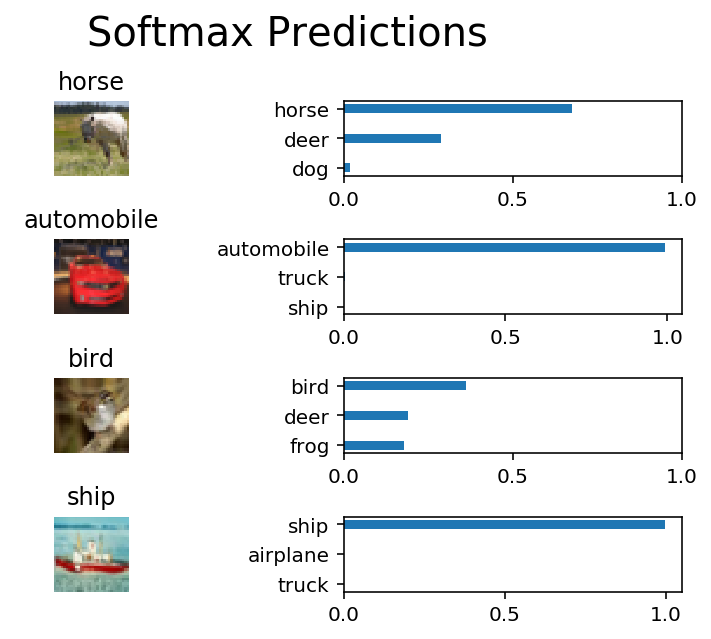

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.